# Model training and evaluation

In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics

In [68]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics():
    sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, cls.predict(X_test)))
    print()
    print(metrics.classification_report(y_test, cls.predict(X_test)))
    print('macro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='macro'))
    plt.show()

In [21]:
def x(classifier):
    new = classifier([[0,1], [1,22]])
    print(new.head())

In [22]:
x(pd.DataFrame)

   0   1
0  0   1
1  1  22


In [23]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [50, 20]

In [152]:
# df = pd.read_csv('data/static_02_no_categorical.csv', index_col=0)
# df = pd.read_csv('data/dynamic_01.csv', index_col=0)

# Compare these datasets:
# df = pd.read_csv('data/normalized/original.csv', index_col=0)
df = pd.read_csv('data/normalized/boxcox.csv', index_col=0)
# df = pd.read_csv('data/normalized/robustscaler_boxcox.csv', index_col=0)
# df = pd.read_csv('data/normalized/quantiletransformer.csv', index_col=0)

In [109]:
df = df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)]

In [153]:
df = df[(df['ratio_running_duration_original'] >= 25) & (df['ratio_running_duration_original'] < 50)]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7781 entries, 0 to 30686
Data columns (total 42 columns):
category_position                        7781 non-null float64
days_duration                            7781 non-null float64
days_preparation                         7781 non-null float64
db_duration                              7781 non-null float64
goal                                     7781 non-null float64
usd_goal                                 7781 non-null float64
deadline_year                            7781 non-null float64
deadline_month                           7781 non-null float64
deadline_day                             7781 non-null float64
deadline_dayofweek                       7781 non-null float64
deadline_hour                            7781 non-null float64
launch_year                              7781 non-null float64
launch_month                             7781 non-null float64
launch_day                               7781 non-null float64
launch_day

In [155]:
df.drop('ratio_running_duration_original', axis=1, inplace=True)

In [156]:
df.sample(5)

,category_position,days_duration,days_preparation,db_duration,goal,usd_goal,deadline_year,deadline_month,deadline_day,deadline_dayofweek,...,faq_count_while_scraping,comments_count_creator_while_scraping,comments_count_public_while_scraping,updates_count_while_scraping,updates_likes_sum_while_scraping,updates_likes_mean_while_scraping,updates_likes_min_while_scraping,updates_likes_max_while_scraping,updates_likes_median_while_scraping,class
18985,4.032448,5.143160,2.672815,5.125407,8.837699,10.844670,1.134843,6.556524,15.736594,4.351109,...,0.0,0.000000,0.393401,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3
23401,4.207205,3.524907,0.672551,3.652197,7.796618,9.319347,2.476339,1.639321,13.227032,4.351109,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2
26486,0.778741,5.143160,1.658396,5.125407,6.628267,7.676833,2.476339,4.079911,1.693534,0.000000,...,0.0,0.000000,0.000000,0.796813,0.000000,0.000000,0.0,0.000000,0.000000,4
9107,2.442581,5.143160,2.163098,5.125407,9.272561,11.502695,1.134843,3.524350,1.693534,3.539251,...,0.0,0.273433,0.519135,0.747310,0.759562,0.451433,0.0,0.598249,0.427899,2
11236,1.757416,6.113054,2.966191,6.089015,10.684177,14.307634,1.134843,4.079911,7.127243,0.954107,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1


In [157]:
# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5446 entries, 23244 to 27049
Data columns (total 40 columns):
category_position                        5446 non-null float64
days_duration                            5446 non-null float64
days_preparation                         5446 non-null float64
db_duration                              5446 non-null float64
goal                                     5446 non-null float64
usd_goal                                 5446 non-null float64
deadline_year                            5446 non-null float64
deadline_month                           5446 non-null float64
deadline_day                             5446 non-null float64
deadline_dayofweek                       5446 non-null float64
deadline_hour                            5446 non-null float64
launch_year                              5446 non-null float64
launch_month                             5446 non-null float64
launch_day                               5446 non-null float64
launch

In [159]:
X_train.head()

,category_position,days_duration,days_preparation,db_duration,goal,usd_goal,deadline_year,deadline_month,deadline_day,deadline_dayofweek,...,usd_pledged,faq_count_while_scraping,comments_count_creator_while_scraping,comments_count_public_while_scraping,updates_count_while_scraping,updates_likes_sum_while_scraping,updates_likes_mean_while_scraping,updates_likes_min_while_scraping,updates_likes_max_while_scraping,updates_likes_median_while_scraping
23244,3.446971,5.065792,2.233377,5.125407,6.628267,7.676833,2.476339,1.639321,15.736594,3.539251,...,3.761261,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
24613,3.225741,5.143160,2.774530,5.125407,9.478020,11.818174,2.476339,2.938751,0.000000,0.000000,...,5.449984,0.0,0.0,0.393401,0.000000,0.0,0.0,0.0,0.0,0.0
1325,0.000000,6.855037,3.392975,6.825717,8.837699,10.844670,0.000000,6.556524,3.089753,4.351109,...,10.473205,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
24494,3.848432,4.355595,3.689049,4.342385,7.033888,8.330263,2.476339,2.314859,14.499447,3.539251,...,0.000000,0.0,0.0,0.000000,0.498976,0.0,0.0,0.0,0.0,0.0
12429,1.757416,6.855037,1.901274,6.825717,7.979271,9.582188,1.134843,4.610990,12.794157,1.848863,...,0.705849,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train[['ratio_pledged_goal']].columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("kickstarter2_boxcox")

%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

cls = RandomForestClassifier()
scores = cross_val_score(cls, df.drop('class', axis=1), df['class'], cv=LeaveOneOut())
print(scores)
print(scores.mean())

%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

cls = LogisticRegression(multi_class='multinomial', solver='newton-cg')
scores = cross_val_score(cls, df.drop('class', axis=1), df['class'], cv=10)
print(scores)
print(scores.mean())

## Classifiers

accuracy:  0.529336188437

             precision    recall  f1-score   support

          1       0.68      0.80      0.74       954
          2       0.18      0.21      0.19       275
          3       0.30      0.09      0.14       546
          4       0.50      0.66      0.57       560

avg / total       0.49      0.53      0.49      2335

macro precision:  0.41554667812
micro precision:  0.529336188437

micro recall:  0.529336188437
macro recall:  0.43802950718

micro f1:  0.529336188437
macro f1:  0.407710902872


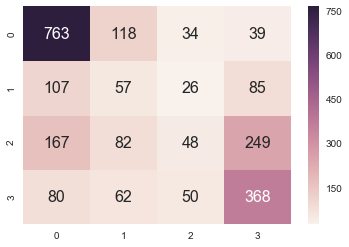

In [160]:
# 0.527623126338 - original data
# 0.529336188437 - used Box-cox
# 0.529336188437 - used Robust Scaler followed by Box-cox
# 0.645824411135 - used Quantile Transformer
from sklearn.naive_bayes import BernoulliNB
cls = BernoulliNB()
cls = cls.fit(X_train, y_train)
print_metrics()

1.0
0.734047109208


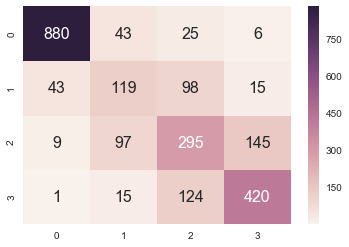

In [161]:
# 0.737473233405
# 0.734047109208
# 0.741327623126
# 0.746466809422
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

1.0
0.652248394004


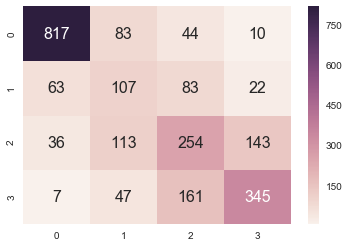

In [162]:
# 0.613704496788
# 0.652248394004
# 0.659528907923
# 0.659957173448
from sklearn.tree import ExtraTreeClassifier
cls = ExtraTreeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

1.0
0.764882226981


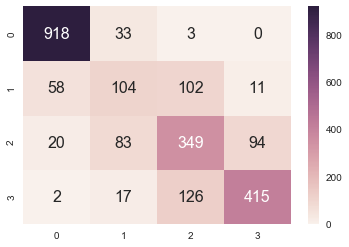

In [163]:
# 0.732334047109
# 0.764882226981
# 0.764882226981
# 0.756745182013
from sklearn.ensemble import ExtraTreesClassifier
cls = ExtraTreesClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.682702901212
0.677944325482


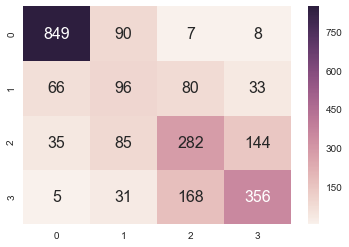

In [164]:
# 0.351605995717
# 0.677944325482
# 0.677944325482
# 0.62312633833
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.739441792141
0.603426124197


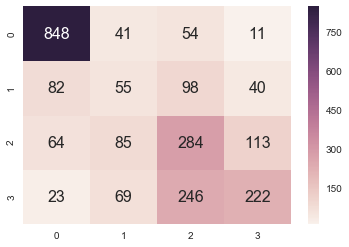

In [165]:
# 0.769164882227
# 0.603426124197
# 0.563169164882
# 0.564025695931
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.79618068307
0.785438972163


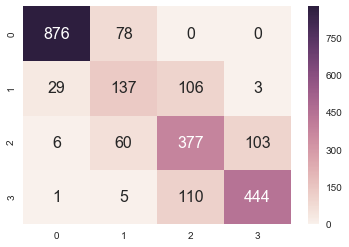

In [166]:
# 0.591006423983
# 0.785438972163
# 0.796145610278
# 0.73704496788
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cls = LinearDiscriminantAnalysis()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.771942710246
0.752890792291


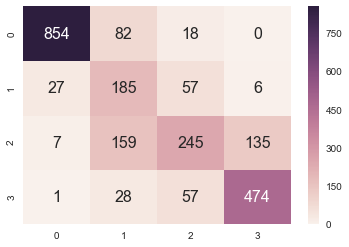

In [167]:
# 0.64625267666
# 0.752890792291
# 0.790149892934
# 0.777301927195
from sklearn.svm import LinearSVC
cls = LinearSVC(multi_class='crammer_singer')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.80940139552
0.804710920771


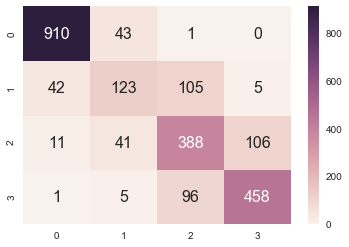

In [168]:
# 0.813276231263
# 0.804710920771
# 0.803426124197
# 0.778586723769
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(multi_class='multinomial', solver='newton-cg')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.808483290488
0.807708779443


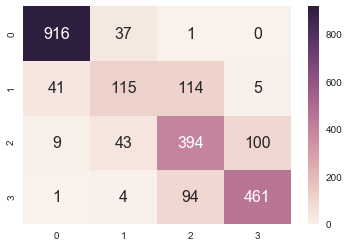

In [169]:
# 0.791862955032
# 0.807708779443
# 0.808565310493
# 0.777301927195
from sklearn.linear_model import LogisticRegressionCV
cls = LogisticRegressionCV(multi_class='multinomial')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.793977230995
0.779443254818


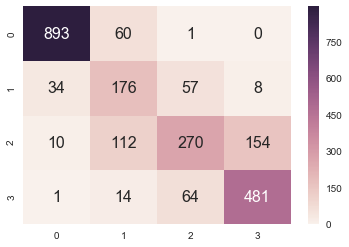

In [170]:
# 0.716916488223
# 0.779443254818
# 0.797858672377
# 0.772162740899
from sklearn.neural_network import MLPClassifier
cls = MLPClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.287734116783
0.277944325482


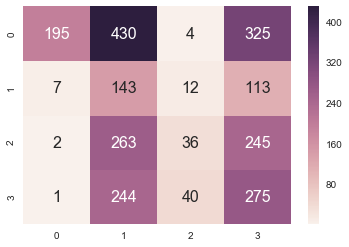

In [171]:
# 0.305781584582
# 0.277944325482
# 0.364025695931
# 0.535760171306
from sklearn.neighbors import NearestCentroid
cls = NearestCentroid()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.738707308116
0.683940042827


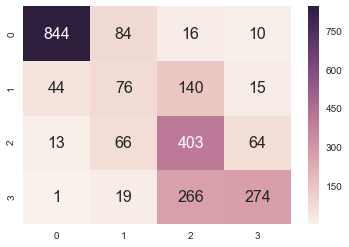

In [172]:
# 0.665524625268
# 0.683940042827
# 0.719914346895
# 0.670663811563
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cls = QuadraticDiscriminantAnalysis()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.401211898641
0.408565310493


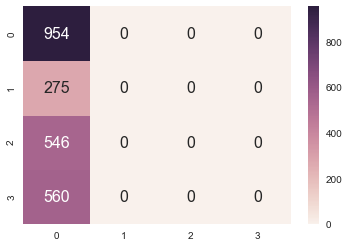

In [173]:
# -
# 0.408565310493
# 0.408565310493
# 0.408565310493
from sklearn.neighbors import RadiusNeighborsClassifier
cls = RadiusNeighborsClassifier(radius=50)
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.993022401763
0.791434689507


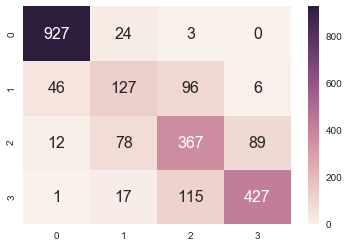

In [174]:
# 0.798715203426
# 0.791434689507
# 0.781584582441
# 0.786295503212
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.731913330885
0.729336188437


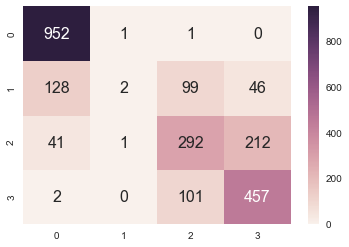

In [175]:
# 0.577301927195
# 0.729336188437
# 0.737473233405
# 0.730620985011
from sklearn.linear_model import RidgeClassifier
cls = RidgeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.731913330885
0.729336188437


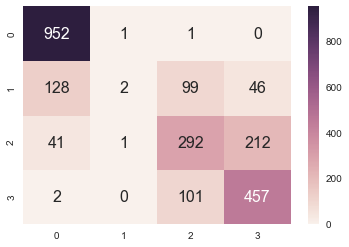

In [176]:
# 0.572591006424
# 0.729336188437
# 0.737473233405
# 0.730620985011
from sklearn.linear_model import RidgeClassifierCV
cls = RidgeClassifierCV()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

### 1v1

1.0
0.61670235546


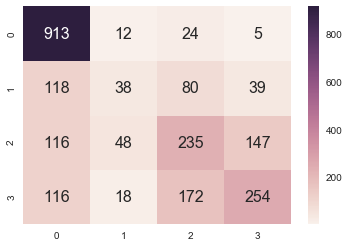

In [177]:
# 0.408565310493
# 0.61670235546
# 0.72591006424
# 0.641541755889
from sklearn.svm import NuSVC
cls = NuSVC(nu=0.1)
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.980168931326
0.601284796574


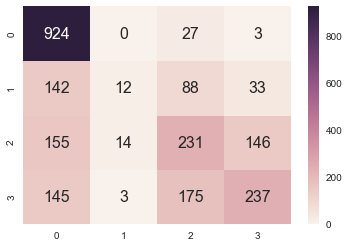

In [178]:
# 0.408565310493
# 0.601284796574
# 0.733618843683
# 0.65182012848
from sklearn.svm import SVC
cls = SVC()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

1.0
0.564025695931


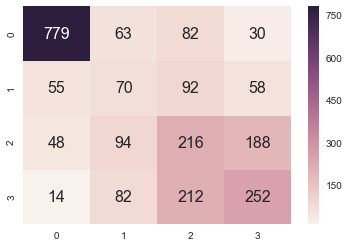

In [179]:
# 0.41755888651
# 0.564025695931
# 0.642826552463
# 0.528907922912
# WARNING SLOW !!!
from sklearn.gaussian_process import GaussianProcessClassifier
cls = GaussianProcessClassifier(multi_class='one_vs_one')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

### 1vAll

0.882666177011
0.815417558887


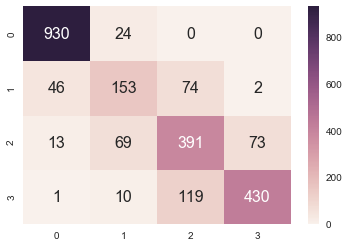

In [180]:
# 0.813704496788
# 0.815417558887
# 0.815417558887
# 0.814989293362
from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

1.0
0.476659528908


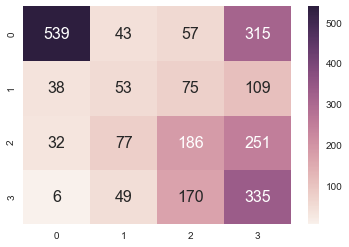

In [181]:
# 0.243683083512
# 0.476659528908
# 0.638115631692
# 0.510064239829
# WARNING SLOW !!!
from sklearn.gaussian_process import GaussianProcessClassifier
cls = GaussianProcessClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.658281307382
0.647537473233


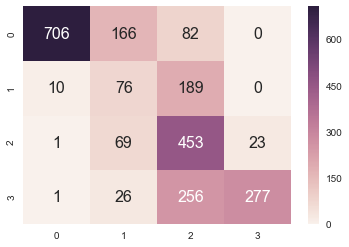

In [182]:
# 0.666809421842
# 0.647537473233
# 0.779014989293
# 0.727194860814
from sklearn.svm import LinearSVC
cls = LinearSVC(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.778553066471
0.78244111349


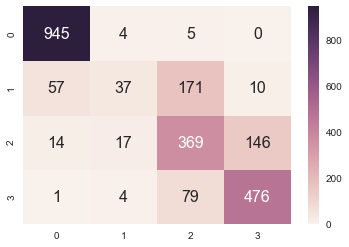

In [183]:
# 0.770021413276
# 0.78244111349
# 0.777730192719
# 0.763597430407
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.74439955931
0.758029978587


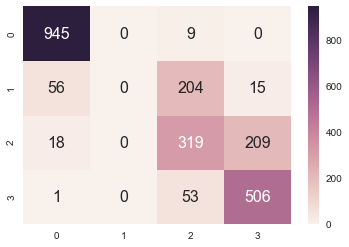

In [184]:
# 0.777730192719
# 0.758029978587
# 0.777730192719
# 0.761884368308
from sklearn.linear_model import LogisticRegressionCV
cls = LogisticRegressionCV(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.753029746603
0.761027837259


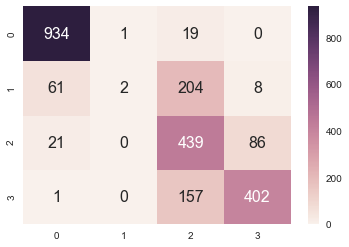

In [185]:
# 0.555032119914
# 0.761027837259
# 0.58244111349
# 0.700642398287
from sklearn.linear_model import SGDClassifier
cls = SGDClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.571061329416
0.577301927195


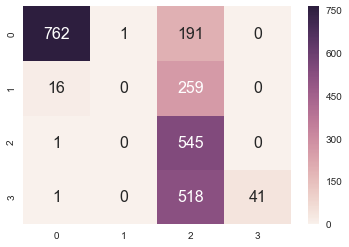

In [186]:
# 0.606852248394
# 0.577301927195
# 0.573447537473
# 0.629122055675
from sklearn.linear_model import Perceptron
cls = Perceptron()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.628901946383
0.647537473233


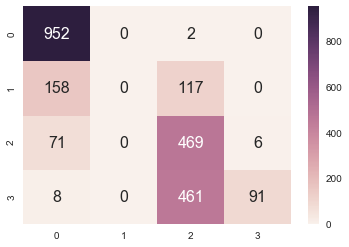

In [187]:
# 0.57687366167
# 0.647537473233
# 0.657815845824
# 0.655674518201
from sklearn.linear_model import PassiveAggressiveClassifier
cls = PassiveAggressiveClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))